In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import pathlib

# Importing Data

In [43]:
training_data='/kaggle/input/brain-tumor-mri-dataset/Training'
testing_data='/kaggle/input/brain-tumor-mri-dataset/Testing'

In [44]:
training_data=pathlib.Path(training_data)
testing_data=pathlib.Path(testing_data)

In [45]:
len(list(training_data.glob('*/*')))

5712

In [46]:
len(list(testing_data.glob('*/*')))

1311

In [47]:
data_set_training={
       'glioma_tumor': list(training_data.glob('glioma/*')),
       'meningioma_tumor':list(training_data.glob('meningioma/*')),
       'no_tumor': list(training_data.glob('notumor/*')),
       'pituitary_tumor': list(training_data.glob('pituitary/*')),
}

In [48]:
data_set_testing={
       'glioma_tumor': list(testing_data.glob('glioma/*')),
       'meningioma_tumor':list(testing_data.glob('meningioma/*')),
       'no_tumor': list(testing_data.glob('notumor/*')),
       'pituitary_tumor': list(testing_data.glob('pituitary/*')),
}

In [49]:
data_set_index={
       'glioma_tumor': 0,
       'meningioma_tumor': 1,
       'no_tumor': 2,
       'pituitary_tumor': 3,
}

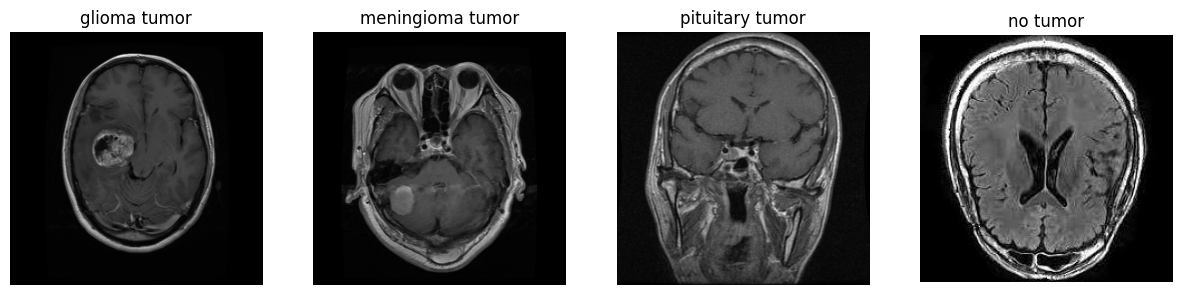

In [50]:
images=[data_set_testing['glioma_tumor'][4],data_set_testing['meningioma_tumor'][0],data_set_testing['pituitary_tumor'][4],data_set_testing['no_tumor'][10]]
names=['glioma tumor','meningioma tumor','pituitary tumor','no tumor']
image_cv=[cv2.imread(str(i)) for i in images]
fig, axs = plt.subplots(1, len(names), figsize=(15, 5))
for i in range(len(names)):
    axs[i].imshow(image_cv[i])
    axs[i].set_title(names[i])
    axs[i].axis('off')

# Image Preprocessing

In [51]:
cv2.imread(str(data_set_training['no_tumor'][0]))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [52]:
X=[]
y=[]
for tumor,images in data_set_training.items():
    for image in images:
        img=cv2.imread(str(image))
        X.append(cv2.resize(img,(180,180)))
        y.append(data_set_index[tumor])

for tumor,images in data_set_testing.items():
    for image in images:
        img=cv2.imread(str(image))
        X.append(cv2.resize(img,(180,180)))
        y.append(data_set_index[tumor])

X=np.array(X)
y=np.array(y)

In [53]:
X.shape,y.shape

((7023, 180, 180, 3), (7023,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [55]:
X_train.shape,X_test.shape

((5618, 180, 180, 3), (1405, 180, 180, 3))

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [58]:
y_test_categorical=keras.utils.to_categorical(y_test)
y_train_categorical=keras.utils.to_categorical(y_train)

# Training Model

In [59]:
model=keras.Sequential([
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(2,2), 
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.MaxPool2D(2,2), 
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16,activation='relu'),
    layers.Dense(4,activation='softmax')
    
    
    
])

In [60]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
             metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 89, 89, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 44, 44, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 44, 44, 64)       

In [62]:
history=model.fit(X_train_scaled,y_train_categorical,epochs=15,validation_split=0.1)

Epoch 1/15


2024-01-20 03:47:21.993950: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


158/158 [==============================] - 16s 86ms/step - loss: 1.0216 - accuracy: 0.5576 - val_loss: 0.7903 - val_accuracy: 0.6566
Epoch 2/15
158/158 [==============================] - 13s 80ms/step - loss: 0.5792 - accuracy: 0.7765 - val_loss: 0.4560 - val_accuracy: 0.8114
Epoch 3/15
158/158 [==============================] - 12s 79ms/step - loss: 0.4399 - accuracy: 0.8374 - val_loss: 0.3158 - val_accuracy: 0.8754
Epoch 4/15
158/158 [==============================] - 12s 78ms/step - loss: 0.3662 - accuracy: 0.8600 - val_loss: 0.3147 - val_accuracy: 0.8808
Epoch 5/15
158/158 [==============================] - 12s 79ms/step - loss: 0.2973 - accuracy: 0.8914 - val_loss: 0.2440 - val_accuracy: 0.8897
Epoch 6/15
158/158 [==============================] - 12s 78ms/step - loss: 0.2569 - accuracy: 0.9005 - val_loss: 0.2628 - val_accuracy: 0.8950
Epoch 7/15
158/158 [==============================] - 12s 79ms/step - loss: 0.2299 - accuracy: 0.9132 - val_loss: 0.2054 - val_accuracy: 0.9306
Epo

# Performance assessement 

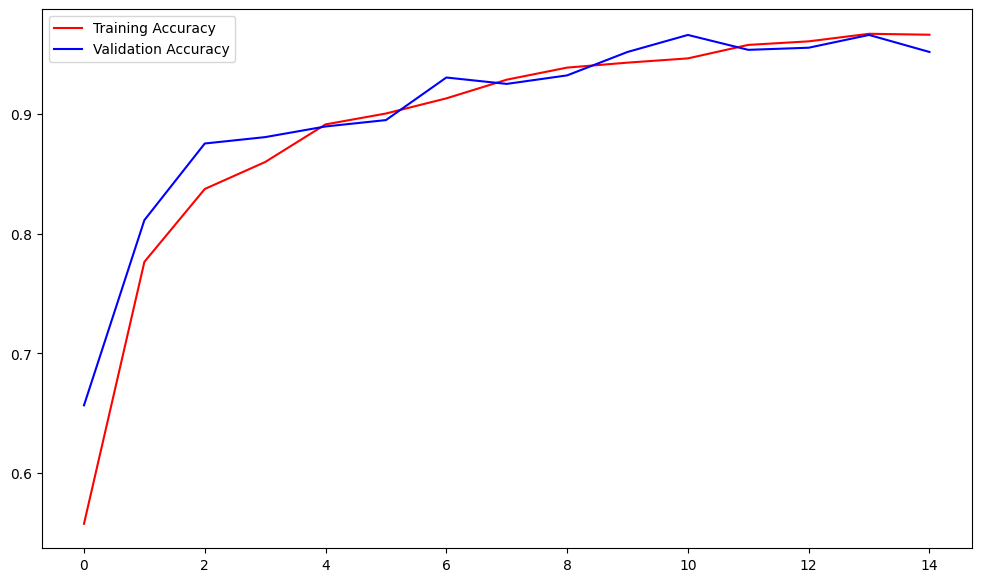

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(12,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

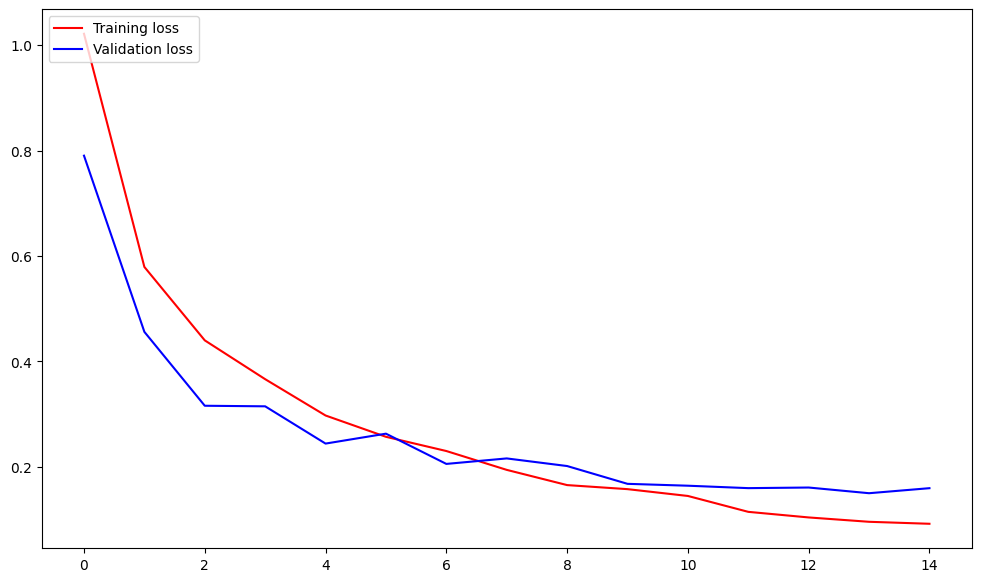

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(12,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
y_arr=model.predict(X_test_scaled)
y_arr[2]

44/44 [==============================] - 1s 15ms/step


array([8.0225088e-10, 4.9874263e-08, 7.2994763e-11, 1.0000000e+00],
      dtype=float32)

In [67]:
y_pred=[]
for i in y_arr:
    y_pred.append(np.argmax(i))
y_pred[2]

3

Text(0.5, 23.52222222222222, 'Predicted')

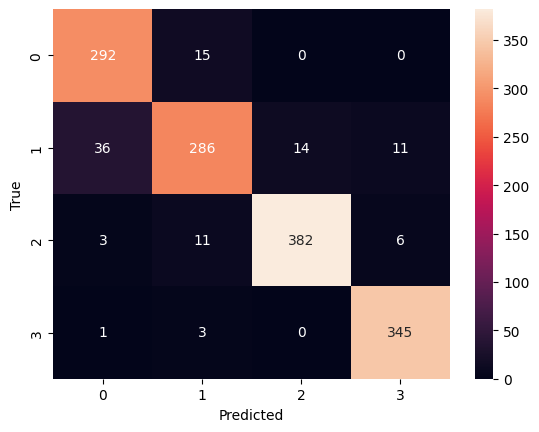

In [68]:
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('True')
plt.xlabel('Predicted')

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       307
           1       0.91      0.82      0.86       347
           2       0.96      0.95      0.96       402
           3       0.95      0.99      0.97       349

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.93      0.93      0.93      1405



In [70]:
model.evaluate(X_test_scaled,y_test_categorical)

44/44 [==============================] - 1s 16ms/step - loss: 0.2239 - accuracy: 0.9288


[0.2239069640636444, 0.9288256168365479]

In [71]:
model.save('braintumorModel.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
